# Tournament assignment

In [9]:
import networkx as nx
import numpy as np
import plotly.figure_factory as ff

A = np.array([[0,1,1,1,1,0],
[1,0,1,1,0,1],
[1,1,0,0,1,1,],
[1,1,0,0,1,1],
[1,0,1,1,0,1],
[0,1,1,1,1,0]])
G = nx.from_numpy_matrix(A)
new_nodes = [12,13,14,23,24,34]
G = nx.relabel_nodes(G, { i: new_nodes[i] for i in range(6)})

#nx.draw(G, with_labels = True, font_color = "white")


In [27]:
import itertools
def calculate_QUBO_explicitely(Q):
    d = len(Q)

    bitstrings = list(map(np.array, list(itertools.product([0, 1], repeat=d))))

    values = []

    for bitstring in bitstrings:
        values.append(bitstring @ Q @ bitstring)

    return values

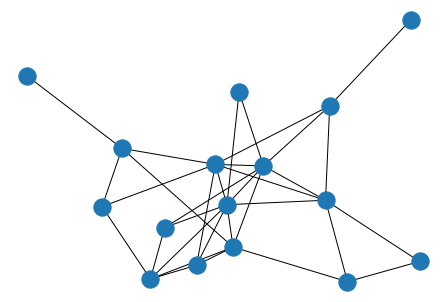

In [69]:
Q = np.loadtxt(r"C:\Users\balin\Downloads\erdos_renyi16_3.txt", delimiter = ",")

def qubo_to_adj(Q):
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):

            #if best_cut[i] != best_cut[j]:
            if i== j:
                Q[i,j] = 0
    return Q

def max_cut_qubo(A):
    for i in range( A.shape[0] ):
        degree = sum(A[i,:])
        A[i, i] = - degree
    return A

A = qubo_to_adj(Q)


#G = nx.from_numpy_matrix(A)
G = nx.erdos_renyi_graph(16, 0.3)
Q = max_cut_qubo(nx.to_numpy_array(G))

nx.draw(G)

In [76]:
#np.savetxt("erdos_renyi16_3.txt",Q, delimiter=",")
len(G.edges)

33

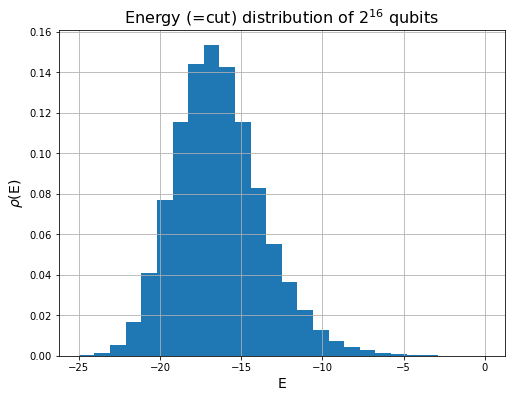

In [75]:
import matplotlib.pyplot as plt
energies = calculate_QUBO_explicitely( Q )

plt.figure(figsize=(8,6))
plt.hist(energies,bins = 26, density=True)
plt.grid()
plt.title("Energy (=cut) distribution of $2^{16}$ qubits",size=16)
plt.xlabel("E",size=14)
plt.ylabel(r"$\rho$(E)",size=14)
plt.savefig("erdos_16_exact_energy_dist.png", dpi = 600)

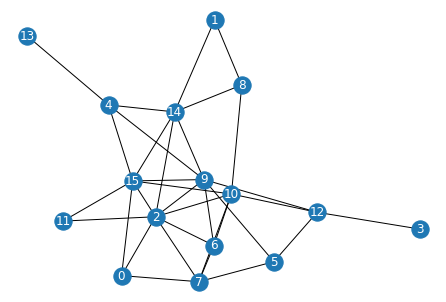

In [73]:

#G = nx.relabel_nodes(G, { i: new_nodes[i] for i in range(16) } )
nx.draw(G, pos = pos ,with_labels = True, font_color = "white")
plt.savefig("erdos_renyi_struct.png",dpi = 600) 

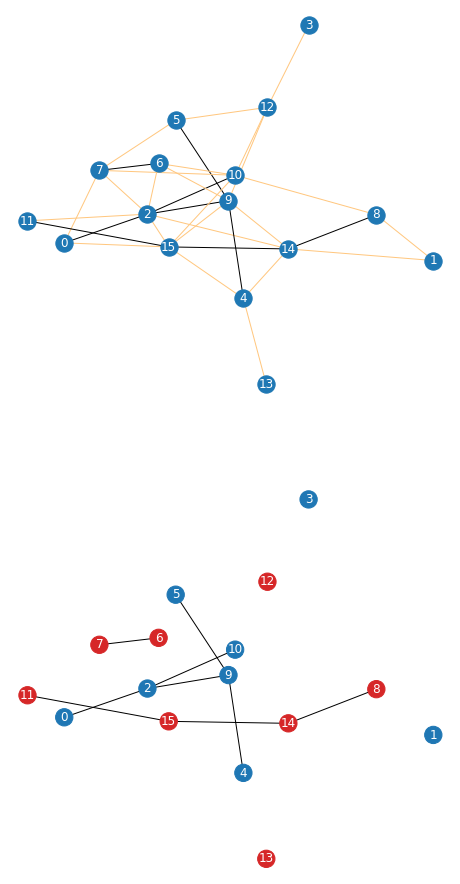

In [155]:
best_cut = [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
color_dict = {1:"tab:red", 0: "tab:blue" }
pos = nx.spring_layout(G)
A2 = nx.to_numpy_array(G)
A3 = nx.to_numpy_array(G)
for i in range(A2.shape[0]):
        for j in range(A2.shape[1]):

            if best_cut[i] != best_cut[j]:
            
                A2[i,j] = 0
                
                if A3[i,j] != 0:
                    A3[i,j] = -1

G3 = nx.from_numpy_matrix(A3)


edges,weights = zip(*nx.get_edge_attributes(G3,'weight').items())

plt.figure(figsize= [8,16])
plt.subplot(121)


nx.draw( G3,
        with_labels  =True, 
        font_color = "white", pos = pos,
        edgelist=edges, edge_color=weights,
        edge_cmap=plt.cm.copper_r)

plt.subplot(122)
nx.draw(nx.from_numpy_array(A2),
        node_color = [ color_dict[e] for e in best_cut], 
        with_labels = True, 
        font_color = "white", pos = pos)

plt.savefig(r"C:\Users\balin\Desktop\10. félév\SciMod\project\src\before-after-cut.png", dpi = 600)

In [127]:
weights

(-1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0)